In [58]:
import pandas as pd
import pycountry
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as dist

In [59]:
education_index = pd.read_csv('~/human_index.csv', sep=';')
education_index.head()

,HDI Rank (2017),Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,168,Afghanistan,..,..,..,..,..,..,..,..,...,0.437,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498
1,68,Albania,0.645,0.626,0.610,0.613,0.619,0.632,0.641,0.641,...,0.724,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785
2,85,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.608,0.617,...,0.709,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.753,0.754
3,35,Andorra,..,..,..,..,..,..,..,..,...,0.831,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858
4,147,Angola,..,..,..,..,..,..,..,..,...,0.502,0.522,0.520,0.535,0.543,0.554,0.564,0.572,0.577,0.581


In [60]:
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_2

education_index['country'] = [countries.get(country, 'Unknown code') for country in education_index.Country]
education_index.head()

,HDI Rank (2017),Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,country
0,168,Afghanistan,..,..,..,..,..,..,..,..,...,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498,AF
1,68,Albania,0.645,0.626,0.610,0.613,0.619,0.632,0.641,0.641,...,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785,AL
2,85,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.608,0.617,...,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.753,0.754,DZ
3,35,Andorra,..,..,..,..,..,..,..,..,...,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858,AD
4,147,Angola,..,..,..,..,..,..,..,..,...,0.522,0.520,0.535,0.543,0.554,0.564,0.572,0.577,0.581,AO


In [61]:
cols = ['country', '2017']
education_index = education_index[cols]

education_index['2017'] = pd.to_numeric(education_index['2017'], errors='coerce')
education_index.set_index('country', inplace=True)
education_index.head()

,2017
country,
AF,0.498
AL,0.785
DZ,0.754
AD,0.858
AO,0.581


In [62]:
technology_index = pd.read_csv('~/tech_index.csv', sep=';')
# technology_index['AMOUNT'] = technology_index['AMOUNT']/len(technology_index['AMOUNT'])
technology_index.head()

,COUNTRY,AMOUNT
0,United States,6.24
1,Taiwan,6.04
2,Finland,5.92
3,Sweden,5.80
4,Japan,5.68


In [63]:
countries['Taiwan'] = 'TW'
technology_index['country'] = [countries.get(country, 'Unknown code') for country in technology_index.COUNTRY]
technology_index.head()

,COUNTRY,AMOUNT,country
0,United States,6.24,US
1,Taiwan,6.04,TW
2,Finland,5.92,FI
3,Sweden,5.80,SE
4,Japan,5.68,JP


In [64]:
cols = ['country', 'AMOUNT']
technology_index = technology_index[cols]
technology_index['AMOUNT'] = pd.to_numeric(technology_index['AMOUNT'], errors='coerce')
technology_index.head()

,country,AMOUNT
0,US,6.24
1,TW,6.04
2,FI,5.92
3,SE,5.80
4,JP,5.68


In [65]:
country_index = pd.read_csv('~/country_index.csv')
country_index = country_index.loc[:, ~country_index.columns.str.contains('^Unnamed')]
country_index.head()

,country,total
0,LK,0.000084
1,US,0.000024
2,PK,0.000021
3,TR,0.000154
4,CL,0.000124


## Country and Education index

In [66]:
country_education = pd.merge(country_index, education_index, on='country').dropna()

In [67]:
country_education.head()

,country,total,2017
0,LK,0.000084,0.770
1,US,0.000024,0.924
2,PK,0.000021,0.562
3,TR,0.000154,0.791
4,CL,0.000124,0.843


In [68]:
n = len(country_education['2017'])
x = np.sort(country_education['2017'])
y = np.arange(1, n+1) / n

Text(0, 0.5, 'Distribution Function')

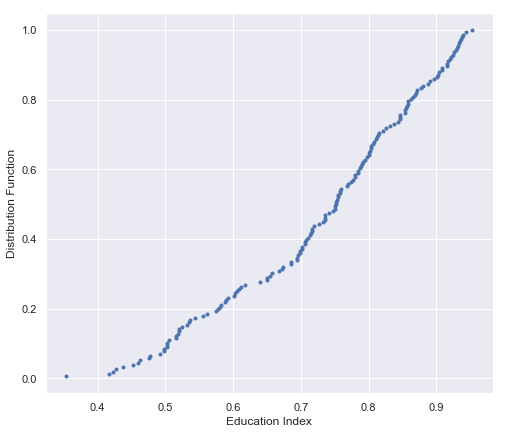

In [69]:
plt.figure(figsize=(8,7))
sns.set()
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("Education Index")
plt.ylabel("Distribution Function")

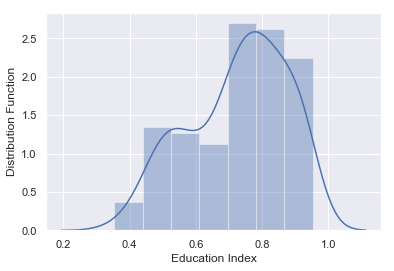

In [70]:
sns.distplot(country_education['2017'])
plt.xlabel("Education Index")
plt.ylabel("Distribution Function")
plt.show()

In [71]:
country_education_pearson = stats.pearsonr(country_education['total'], country_education['2017'])
country_education_pearson

(-0.0682248718156177, 0.39740675530886205)

In [30]:
country_education.corr()

,total,2017
total,1.000000,-0.068225
2017,-0.068225,1.000000


## Country and Technology index

In [31]:
country_technology = pd.merge(country_index, technology_index, on='country').dropna()

In [32]:
n = len(country_technology['AMOUNT'])
x = np.sort(country_technology['AMOUNT'])
y = np.arange(1, n+1) / n

Text(0, 0.5, 'Distribution Function')

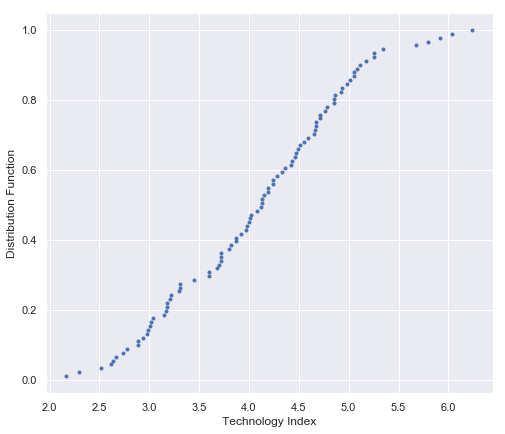

In [33]:
plt.figure(figsize=(8,7))
sns.set()
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("Technology Index")
plt.ylabel("Distribution Function")

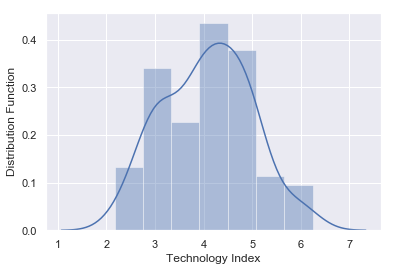

In [41]:
sns.distplot(country_technology['AMOUNT'])
plt.xlabel("Technology Index")
plt.ylabel("Distribution Function")
plt.show()

In [34]:
country_technology_pearson = stats.pearsonr(country_technology['total'], country_technology['AMOUNT'])
country_technology_pearson

(0.040632274632839804, 0.7021595330558136)

In [35]:
country_technology.corr()

,total,AMOUNT
total,1.000000,0.040632
AMOUNT,0.040632,1.000000
